# UMAP Dimensionality reduction on spectrogram data of acoustic events from 11 species of birds

Dataset from: https://zenodo.org/record/1250690#.YOs-bXUzbGK
We choose 2500 samples for this code. The time series data is converted to spectrogram and mean & stdev were found wrt frequency bands, then a flattened matrix with mean/stdev values are fed to UMAP algorithm

## 11 labels: 
### 0 to 10 labels - Great Blue Heron, American Crow, Cedar Waxwing, House Finch, Common Yellowthroat, Indigo Bunting, Chipping Sparrow, American Yellow, Warbler Marsh Wren, Blue Jay, Song Sparrow
### 'unknown events' not considered

In [87]:
import matplotlib
import umap
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import numpy as np
import random
import os
#import pandas as pd
#loaded libraries

In [88]:
classes=11
num=[0] * classes
print(num)
for filen in range(classes):
      onlyfiles = next(os.walk('/home/devanandt/Downloads/Bird12/no_unknown_events/'+ str(filen)+ '/'))[2]
      num[filen]=len(onlyfiles)
print(num)    
#estimated number of files from dataset and loaded those numbers to a list

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[246, 247, 247, 249, 249, 251, 252, 253, 253, 256, 259]


In [89]:
nn=[]
#num=[135,315,339,402,441,335,235,310,142,217,94,256]
numsum=np.cumsum(num)
for y in range(classes):
      for x in range(0,num[y]):
            string='/home/devanandt/Downloads/Bird12/no_unknown_events/'+ str(y)+ '/'+ str(x) +'.wav'
            samplerate, dat = wavfile.read(string)
            n=np.shape(dat)
            n=n[0]
            nn += [n]       
files=sum(num)
print(files)
#estimated the maximum length of vectors(from wav files) in the database(variable `nn`)

2762


In [90]:
id=np.zeros((files), dtype='int16')
ii=np.zeros((files), dtype='int16')
idcum=np.zeros((files), dtype='int16')

for jj in range(files):
      if (jj<numsum[0]):
          id[jj]=0
          idcum[jj]=jj 
      elif (jj>=numsum[0] and jj<numsum[1]):
          id[jj]=1
          idcum[jj]=jj-num[0]             
      elif (jj>=numsum[1] and jj<numsum[2]):
          id[jj]=2
          idcum[jj]=jj-sum(num[:2])           
      elif (jj>=numsum[2] and jj<numsum[3]):
          id[jj]=3
          idcum[jj]=jj-sum(num[:3])           
      elif (jj>=numsum[3] and jj<numsum[4]):
          id[jj]=4
          idcum[jj]=jj-sum(num[:4])                    
      elif (jj>=numsum[4] and jj<numsum[5]):
          id[jj]=5
          idcum[jj]=jj-sum(num[:5])                
      elif (jj>=numsum[5] and jj<numsum[6]):
          id[jj]=6
          idcum[jj]=jj-sum(num[:6])   
      elif (jj>=numsum[6] and jj<numsum[7]):
          id[jj]=7
          idcum[jj]=jj-sum(num[:7])                   
      elif (jj>=numsum[7] and jj<numsum[8]):
          id[jj]=8
          idcum[jj]=jj-sum(num[:8]) 
      elif (jj>=numsum[8] and jj<numsum[9]):
          id[jj]=9
          idcum[jj]=jj-sum(num[:9])              
      elif (jj>=numsum[9] and jj<numsum[10]):
          id[jj]=10        
          idcum[jj]=jj-sum(num[:10])              

nsig=2500
#nsig is 1000 random vectors from the database for this code
s=random.sample(range(files), nsig)
#print(s)
#print(id[s])
#idcum is ids specific to each subfolder in database
#id is the label of the data

In [42]:
#def rolling_window(a, window_size):
#      shape = (a.shape[0] - window_size + 1, window_size) + a.shape[1:]
#      strides = (a.strides[0],) + a.strides
#      return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)

In [91]:
nmax=np.amax(nn)
dat=np.zeros((len(s),nmax), dtype='float16')
fs, da = wavfile.read('/home/devanandt/Downloads/Bird12/no_unknown_events/0/0.wav')
#one sample signal
da=da/np.max(da)
da=np.pad(da, (0, nmax - len(da)), 'constant')
f, t, Sxx = signal.spectrogram(da, fs)
h,v=np.shape(Sxx)
#plt.pcolormesh(t[0:439], f[0:20], Sxx[0:20,0:439],shading='gouraud')
windows=50
roll_rets = rolling_window(np.transpose(Sxx),windows)
#print(roll_rets)
#print(np.shape(roll_rets))
#print(h,v)

In [122]:
snip=0
spectrogram=np.zeros((h,v-snip,nsig))
#roll_rets=np.zeros((h-windows+1,windows,v,nsig),dtype='float16')
roll_rets=np.zeros((390-snip,windows,129,nsig),dtype='float16')

c=np.zeros((len(s),1), dtype='int16')
idd=np.vstack((id,idcum))
i=0
for y in s:
      string='/home/devanandt/Downloads/Bird12/no_unknown_events/'+ str(idd[0,y])+ '/'+ str(idd[1,y]) +'.wav'
      samplerate, da = wavfile.read(string)
      da=da-np.mean(da)
      da=da/np.std(da)
      dat[i,:]=np.pad(da, (0, nmax - len(da)), 'constant')
      frequencies, times[0:v-snip], spectrogram[:,:,i] = signal.spectrogram(dat[i,0:(v-snip)], samplerate)  
#      spectrogram[:,:,i]=spectrogram[:,:,i]/np.max(spectrogram[:,:,i])
      #print(np.shape(roll_rets[:,:,i:((i+1)*nsig)]))
      #print(np.shape(rolling_window(np.transpose(spectrogram[:,340,i]),windows)))    
      #print(np.shape(roll_rets[:,:,:,i]))
      #roll_rets[:,:,:,i] = rolling_window(np.transpose(spectrogram[:,0:(439-snip),i]),windows)
      c[i]=y
      i=i+1
#spec=np.reshape(spectrogram[:,0:200,:],(nsig,h*200))
m=np.mean(spectrogram,axis=1)
stdev=np.std(spectrogram,axis=1)
ms=np.transpose(np.concatenate((m,stdev),axis=0))


iw = ms
m=np.transpose(m)
stdev=np.transpose(stdev)
print(np.shape(iw))
iw[:,0::2] = m
iw[:,1::2] = stdev
#iw is interwoven version of ms array
#print(np.shape(ms))
#spec=np.reshape(spectrogram,(nsig,h*(v-snip)))
#spec=np.reshape(roll_rets,(nsig,(390-snip)*windows*129))
#Prepared data matrix from vectors, optionally spectrogram of data can be calculated

(2500, 258)


/home/devanandt/anaconda2/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: set_ticks() must have been called.
  # Remove the CWD from sys.path while we load stuff.


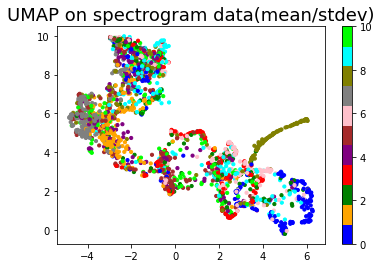

In [135]:
reducer = umap.UMAP(n_neighbors=15,min_dist=0.25,n_components=3,metric='correlation',n_epochs=2000)
embedding = reducer.fit_transform(iw)

colors = ['blue', 'orange' , 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'lime']
plt.scatter(embedding[:, 0], embedding[:, 1], c=id[s], cmap=matplotlib.colors.ListedColormap(colors), s=10)


plt.title("UMAP on spectrogram data(mean and stdev)", fontsize=18)
cb = plt.colorbar()
cb.set_ticklabels(colors)
plt.show()
#UMAP applied and plotted the results

/home/devanandt/anaconda2/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: set_ticks() must have been called.
  


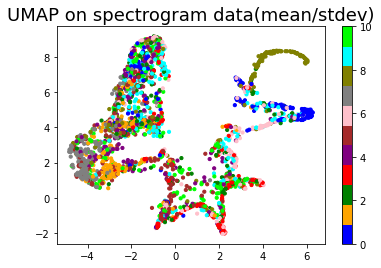

In [136]:
plt.scatter(embedding[:, 0], embedding[:, 2], c=id[s], cmap=matplotlib.colors.ListedColormap(colors), s=10)


plt.title("UMAP on spectrogram data(mean and stdev)", fontsize=18)
cb = plt.colorbar()
cb.set_ticklabels(colors)
plt.show()
#UMAP applied and plotted the results
#print(np.shape(spec))